In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'time_series.csv')

In [3]:
df.head()


,date,username,followers,following
0,2024-01-01,alex,151,200
1,2024-01-02,alex,152,203
2,2024-01-03,alex,160,203
3,2024-01-04,alex,162,203
4,2024-01-05,alex,165,207


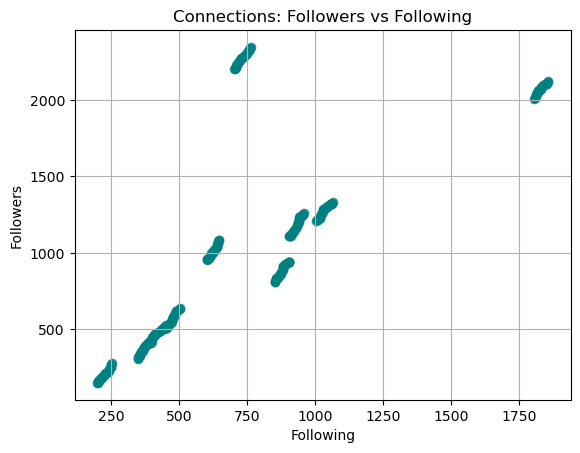

In [4]:
# Basic scatter plot
plt.figure()
plt.scatter(df["following"], df["followers"], color="teal", alpha=0.7)
plt.title("Connections: Followers vs Following")
plt.xlabel("Following")
plt.ylabel("Followers")
plt.grid(True)
plt.show()

	•	Does the pattern look linear?
	•	Who are the outliers?
	•	Could we calculate correlation?

In [5]:
corr = df["followers"].corr(df["following"])
print(f"Correlation between followers and following: {corr:.2f}")

Correlation between followers and following: 0.75


If correlation is near 1 → strong relationship <br>
If near 0 → no relationship

<b>Scatter plots reveal relationships, not just quantities.</b>

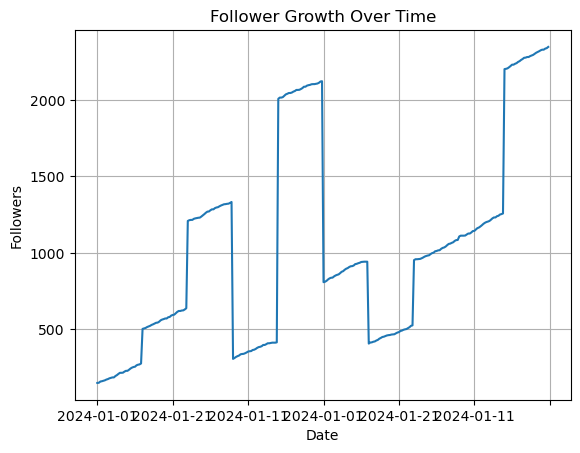

In [6]:

# Plot using pandas built-in plotting (which uses matplotlib)
df.plot(x="date", y="followers", kind="line", legend=False)
plt.title("Follower Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Followers")
plt.grid(True)
plt.show()

	•	Each data point represents a moment in time.
	•	We can smooth or resample data for weekly or monthly summaries.

In [7]:
## Rolling average
#rolling_avg = df["followers"].rolling(10).mean()
#rolling_avg.plot(kind="bar", figsize=(20,4), color="coral")

## Resampling

In [8]:
# convert our date from text to pandas DT
df["date"] = pd.to_datetime(df["date"])
df["week"] = df["date"].dt.isocalendar().week
df.head()


,date,username,followers,following,week
0,2024-01-01,alex,151,200,1
1,2024-01-02,alex,152,203,1
2,2024-01-03,alex,160,203,1
3,2024-01-04,alex,162,203,1
4,2024-01-05,alex,165,207,1


In [9]:
# Calculate average followers for each user
weekly_avg = df.groupby("username")["followers"].mean()

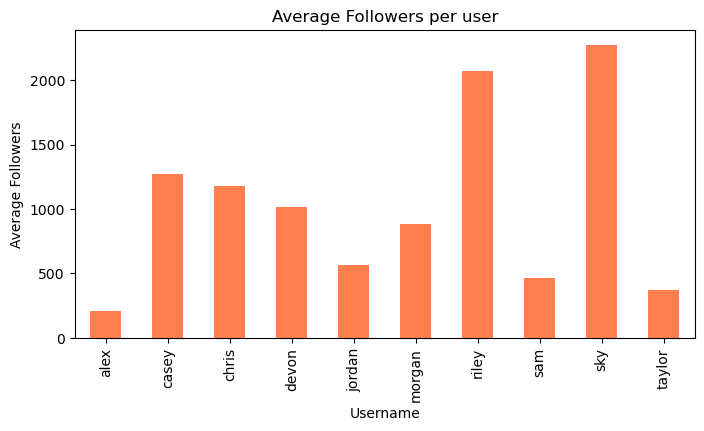

In [10]:
weekly_avg.plot(kind="bar", figsize=(8,4), color="coral")
plt.title("Average Followers per user")
plt.xlabel("Username")
plt.ylabel("Average Followers")
plt.show()

In [11]:
# Calculate average followers each week
weekly_avg = df.groupby("week")["followers"].mean()

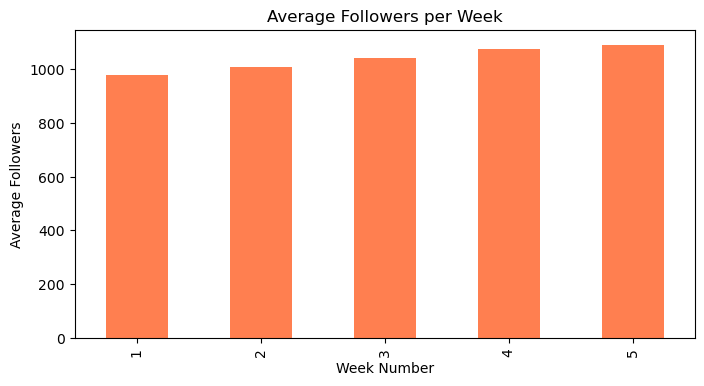

In [12]:
weekly_avg.plot(kind="bar", figsize=(8,4), color="coral")
plt.title("Average Followers per Week")
plt.xlabel("Week Number")
plt.ylabel("Average Followers")
plt.show()

# Trends
Using seaborn we can see trends

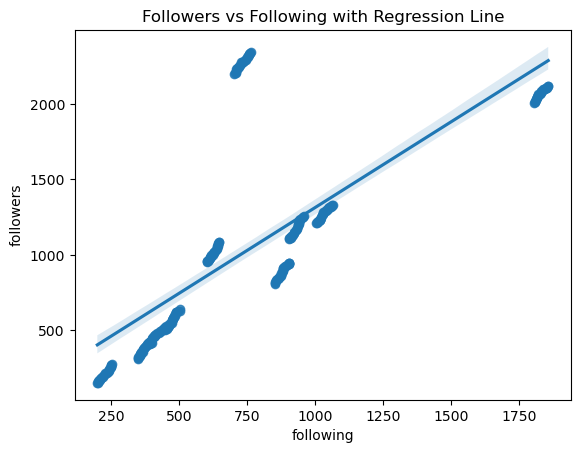

In [13]:
import seaborn as sns
sns.regplot(x="following", y="followers", data=df)
plt.title("Followers vs Following with Regression Line")
plt.show()

# Interactive

Use Altair to visualize this kind of data interactively

In [14]:
!conda install altair -y
import altair as alt

/Users/smore/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
/Users/smore/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configur

In [15]:
# Enable inline rendering (for Jupyter Notebook or JupyterLab)
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [16]:
# Melt
# Melt the data for plotting both followers and following in one chart
df_melted = df.melt(id_vars=["date", "username"], value_vars=["followers", "following"],
                    var_name="metric", value_name="count")

In [17]:
# Create Altair line chart
chart = (
    alt.Chart(df_melted)
    .mark_line(point=True)
    .encode(
        x="date:T",
        y="count:Q",
        color="metric:N",
        facet="username:N",
        tooltip=["date:T", "username:N", "metric:N", "count:Q"]
    )
    .properties(title="Follower & Following Trends by User")
    .interactive()
)

chart
#chart.save('followers_following_chart.html')

alt.Chart(...)